#Actividad 3 - Transformaciones

Frida Cano Falcón - A01752953

## Extracción de datos

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%cd "/content/drive/MyDrive/7mo Semestre/Estadistica"
!ls

/content/drive/MyDrive/Semestres/7mo Semestre/Estadistica
Act1_Distribuciones_FridaCano_A01752953.ipynb
Act2_ExplorandoBases_FridaCano_A01752953.ipynb
Act3_Transformaciones_FridaCanoFalcon_A01752953.ipynb
mc-donalds-menu-1.csv


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
# Importing library
from scipy.stats import skew, kurtosis

In [44]:
data_base = pd.read_csv('mc-donalds-menu-1.csv')
data_base.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Normalización

La variable a transformar para normalizar es: **Sodium**

In [45]:
data = data_base["Sodium"]
# Debido a que el dataframe contiene valores igual a 0  les sumamos 1 a todos los valores.
data = data+1
print(data)

0      751
1      771
2      781
3      861
4      881
      ... 
255    281
256    381
257    191
258    401
259    201
Name: Sodium, Length: 260, dtype: int64


In [46]:
# Verificar si hay valores negativos en el DataFrame
hay_ceros = (data <= 0).any().any()
if hay_ceros:
    print("El DataFrame contiene valores negativos.")
else:
    print("El DataFrame no contiene valores negativos.")

El DataFrame no contiene valores negativos.


Transformación con Box-Cox

In [47]:
# Funcion Box-cox
transformed_data, lambda_value = stats.boxcox(data)

# Imprimir el DataFrame con los datos transformados y el valor de lambda

print("Valor de lambda:", lambda_value)

Valor de lambda: 0.2103467311625166


Las ecuaciones son:

In [48]:
x = np.linspace(np.min(data),np.max(data),260)
# Ecuación práctica
eq_1 = np.sqrt(x+1)
# Ecuación precisa
eq_2 = (np.power((x+1),lambda_value)-1)/lambda_value

Analiza la normalidad de las transformaciones obtenidas con los datos originales. Utiliza como argumento de normalidad:

1.   Compara las medidas: Mínimo, máximo, media, mediana, cuartil 1 y cuartil 3, sesgo y curtosis.




In [49]:
datos = ['Datos originales', 'Ec. aproximada', 'Ec. exacta']
# Mínimos
eq1_min = np.min(eq_1)
eq2_min = np.min(eq_2)
data_min = np.min(data)
mins = [data_min, eq1_min, eq2_min]

# Máximos
eq1_max = np.max(eq_1)
eq2_max = np.max(eq_2)
data_max = np.max(data)
maxs = [data_max,eq1_max,eq2_max]

# Media
eq1_media = np.mean(eq_1)
eq2_media = np.mean(eq_2)
data_media = np.mean(data)
means = [data_media, eq1_media, eq2_media]

# Mediana
eq1_median = np.median(eq_1)
eq2_median = np.median(eq_2)
data_median = np.median(data)
medians = [data_median,eq1_median,eq2_median]

# Cuartiles
eq1_cuartiles = np.percentile(eq_1, [25, 50, 75])
eq2_cuartiles = np.percentile(eq_2, [25, 50, 75])
data_cuartiles = np.percentile(data, [25, 50, 75])
q1s = [data_cuartiles[0],eq1_cuartiles[0],eq2_cuartiles[0]]
q3s = [data_cuartiles[2],eq1_cuartiles[2],eq2_cuartiles[2]]

# Sesgo
eq1_sesgo = stats.skew(eq_1)
eq2_sesgo = stats.skew(eq_2)
data_sesgo = stats.skew(data)
sesgos = [data_sesgo, eq1_sesgo, eq2_sesgo]

# Curtosis
eq1_curt = stats.kurtosis(eq_1)
eq2_curt = stats.kurtosis(eq_2)
data_curt = stats.kurtosis(data)
curts = [data_curt, eq1_curt,eq2_curt]

# Tabla
tabla_info = {'Mínimo': mins, 'Q1': q1s, 'Mediana': medians, 'Media': means, 'Q3': q3s, 'Máximo':maxs, 'Curtosis':curts}
tabla = pd.DataFrame(tabla_info)
print(tabla)

     Mínimo          Q1     Mediana       Media          Q3       Máximo  \
0  1.000000  108.500000  191.000000  496.750000  866.000000  3601.000000   
1  1.414214   30.033147   42.449892   39.995676   51.980733    60.016664   
2  0.746226   15.138046   18.255121   17.222675   20.301720    21.863709   

   Curtosis  
0  2.796412  
1 -0.575289  
2  1.355971  



2.   Obten el histograma de los 2 modelos obtenidos (exacto y aproximado) y los datos originales.

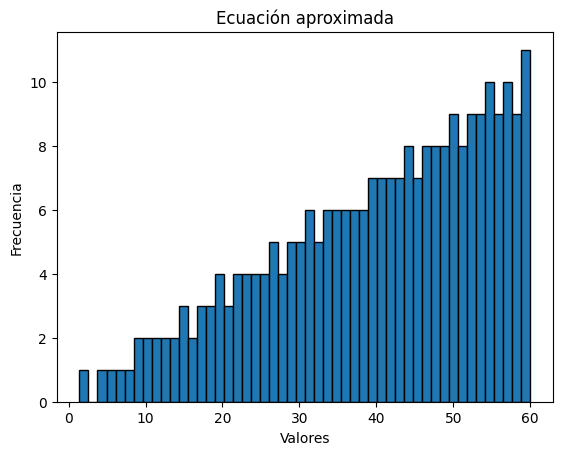

In [50]:
# Visualizar el histograma
plt.hist(eq_1, 50, edgecolor='black')
plt.title("Ecuación aproximada")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

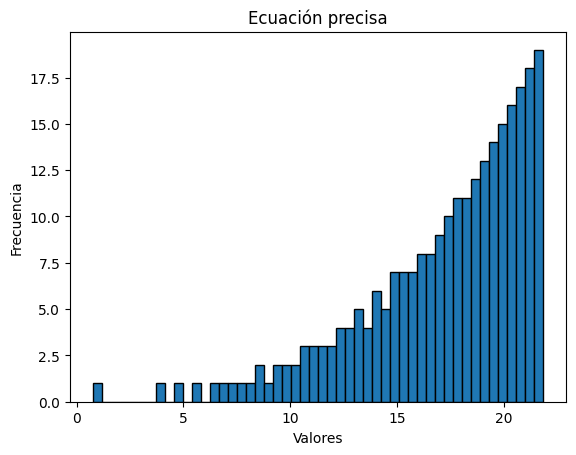

In [51]:
# Visualizar el histograma
plt.hist(eq_2, 50, edgecolor='black')
plt.title("Ecuación precisa")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

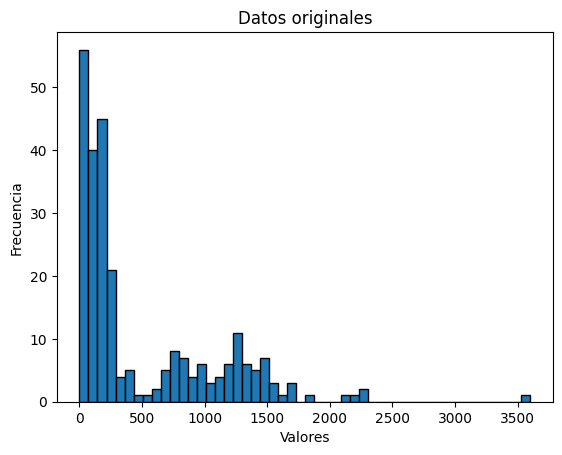

In [52]:
# Visualizar el histograma
plt.hist(data,50, edgecolor='black')
plt.title("Datos originales")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

3.   Realiza la prueba de normalidad de Anderson-Darling o de Jarque Bera para los datos transformados y los originales

In [53]:
_eq1, critical_values_eq1, significance_levels_eq1 = stats.anderson(eq_1, dist='norm')
_eq2, critical_values_eq2, significance_levels_eq2 = stats.anderson(eq_2, dist='norm')
_data, critical_values_data, significance_levels_data = stats.anderson(data, dist='norm')

print(f"Resultados para Ecuación Aproximada:")
print(f"Estadístico Anderson-Darling: {_eq1}")
print("Niveles críticos:", critical_values_eq1)
print("Niveles de significancia:", significance_levels_eq1)
print("-" * 30)

print(f"\nResultados para Ecuación Exacto:")
print(f"Estadístico Anderson-Darling: {_eq2}")
print("Niveles críticos:", critical_values_eq2)
print("Niveles de significancia:", significance_levels_eq2)
print("-" * 30)

print(f"\nResultados para Datos originales:")
print(f"Estadístico Anderson-Darling: {_data}")
print("Niveles críticos:", critical_values_data)
print("Niveles de significancia:", significance_levels_data)
print("-" * 30)

Resultados para Ecuación Aproximada:
Estadístico Anderson-Darling: 3.731852911849842
Niveles críticos: [0.567 0.646 0.775 0.904 1.076]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
------------------------------

Resultados para Ecuación Exacto:
Estadístico Anderson-Darling: 7.267329591457155
Niveles críticos: [0.567 0.646 0.775 0.904 1.076]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
------------------------------

Resultados para Datos originales:
Estadístico Anderson-Darling: 21.405561557715373
Niveles críticos: [0.567 0.646 0.775 0.904 1.076]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
------------------------------


Aplicamos la grafica de bogote para revisar si existen valores atípicos

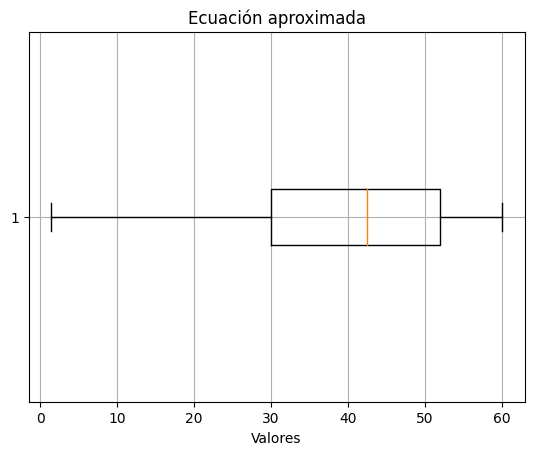

In [54]:
# Valores Ecuación aproximada
plt.boxplot(eq_1, vert=False)
plt.title("Ecuación aproximada")
plt.xlabel("Valores")
plt.grid(True)
plt.show()

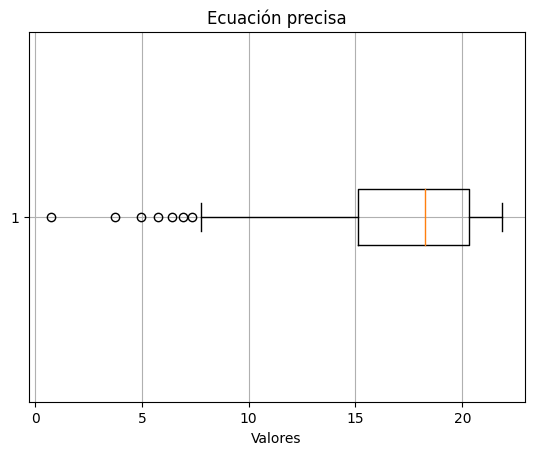

In [55]:
# Valores originales
plt.boxplot(eq_2,vert=False)
plt.title("Ecuación precisa")
plt.xlabel("Valores")
plt.grid(True)
plt.show()

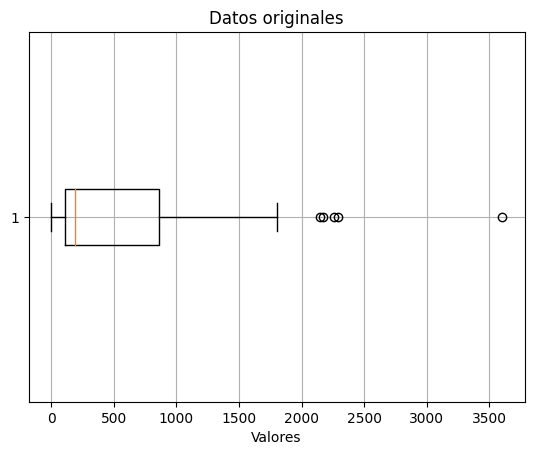

In [56]:
# Valores originales
plt.boxplot(data,vert=False)
plt.title("Datos originales")
plt.xlabel("Valores")
plt.grid(True)
plt.show()

Detección de anomalías y corrección de base de datos.

Vemos que despues de aproximadamente 2000 existen valores atípicos, por lo que estos serán eliminados.

In [60]:
data = data.drop(data[data >=2000].index)
print(data)

0      751
1      771
2      781
3      861
4      881
      ... 
255    281
256    381
257    191
258    401
259    201
Name: Sodium, Length: 255, dtype: int64


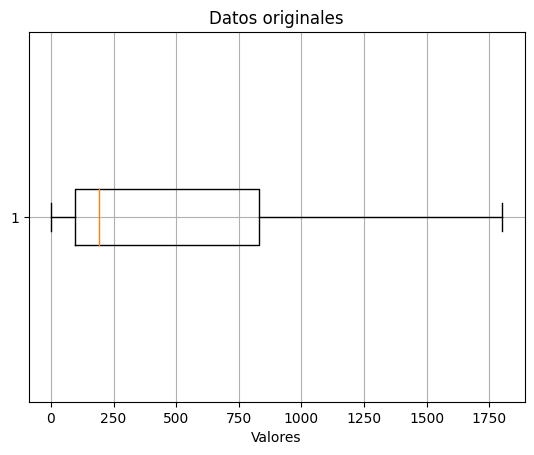

In [61]:
# Valores originales
plt.boxplot(data,vert=False)
plt.title("Datos originales")
plt.xlabel("Valores")
plt.grid(True)
plt.show()

Utilizamos la transformación de Yeo Johnson

In [63]:
# Aplicar la transformación Yeo-Johnson
transformed_data, lambda_value_yj = stats.yeojohnson(data)

print("Valor lambda:", lambda_value_yj)

Valor lambda: 0.2041285582397882


Ecuación:

In [71]:
x = np.linspace(np.min(data),np.max(data),260)

# Ecuacion aproximada
yj_eq1 = x ** 2
# Ecuacion precisa
yj_eq2 = (((x+1)**lambda_value_yj) - 1)/ lambda_value_yj

Análisis:

In [72]:
datos = ['Datos originales', 'Ec. aproximada', 'Ec. exacta']
# Mínimos
eq1_min = np.min(yj_eq1)
eq2_min = np.min(yj_eq2)
data_min = np.min(data)
mins = [data_min, eq1_min, eq2_min]

# Máximos
eq1_max = np.max(yj_eq1)
eq2_max = np.max(yj_eq2)
data_max = np.max(data)
maxs = [data_max,eq1_max,eq2_max]

# Media
eq1_media = np.mean(yj_eq1)
eq2_media = np.mean(yj_eq2)
data_media = np.mean(data)
means = [data_media, eq1_media, eq2_media]

# Mediana
eq1_median = np.median(yj_eq1)
eq2_median = np.median(yj_eq2)
data_median = np.median(data)
medians = [data_median,eq1_median,eq2_median]

# Cuartiles
eq1_cuartiles = np.percentile(yj_eq1, [25, 50, 75])
eq2_cuartiles = np.percentile(yj_eq2, [25, 50, 75])
data_cuartiles = np.percentile(data, [25, 50, 75])
q1s = [data_cuartiles[0],eq1_cuartiles[0],eq2_cuartiles[0]]
q3s = [data_cuartiles[2],eq1_cuartiles[2],eq2_cuartiles[2]]

# Sesgo
eq1_sesgo = stats.skew(yj_eq1)
eq2_sesgo = stats.skew(yj_eq2)
data_sesgo = stats.skew(data)
sesgos = [data_sesgo, eq1_sesgo, eq2_sesgo]

# Curtosis
eq1_curt = stats.kurtosis(yj_eq1)
eq2_curt = stats.kurtosis(yj_eq2)
data_curt = stats.kurtosis(data)
curts = [data_curt, eq1_curt,eq2_curt]

# Tabla
tabla_info = {'Mínimo': mins, 'Q1': q1s, 'Mediana': medians, 'Media': means, 'Q3': q3s, 'Máximo':maxs, 'Curtosis':curts}
tabla = pd.DataFrame(tabla_info)
print(tabla)

     Mínimo             Q1        Mediana         Media            Q3  \
0  1.000000      96.000000     191.000000  4.575686e+02  8.310000e+02   
1  1.000000  203410.056216  811813.074954  1.083886e+06  1.825210e+06   
2  0.744581      12.165260      14.750005  1.389156e+01  1.644228e+01   

         Máximo  Curtosis  
0  1.801000e+03 -0.401472  
1  3.243601e+06 -0.855582  
2  1.773135e+01  1.231824  


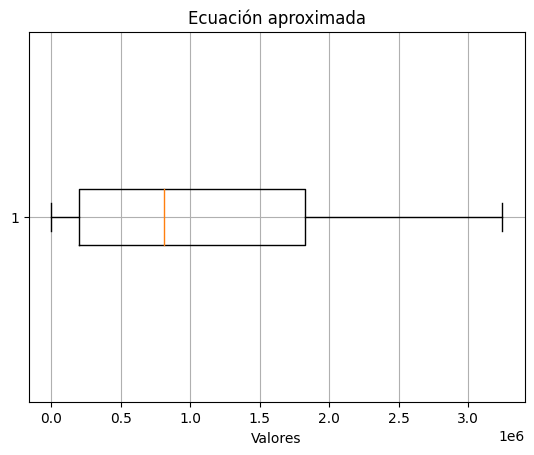

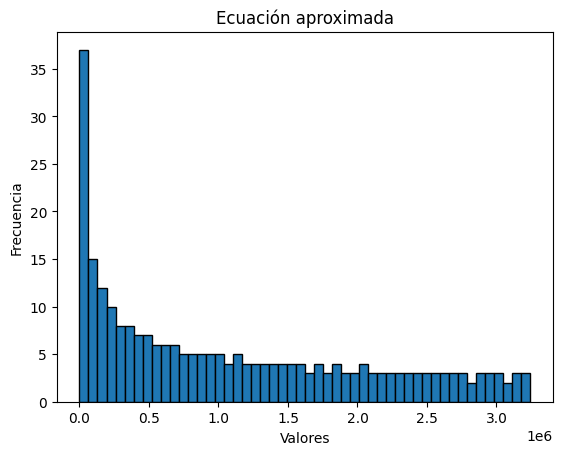

In [77]:
# Valores Ecuación aproximada
plt.boxplot(yj_eq1, vert=False)
plt.title("Ecuación aproximada")
plt.xlabel("Valores")
plt.grid(True)
plt.show()

# Visualizar el histograma
plt.hist(yj_eq1, 50, edgecolor='black')
plt.title("Ecuación aproximada")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

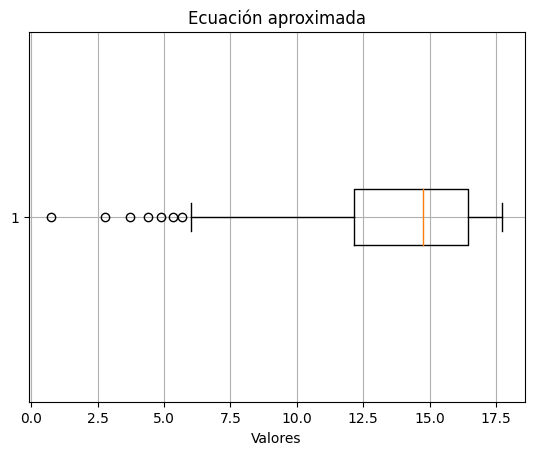

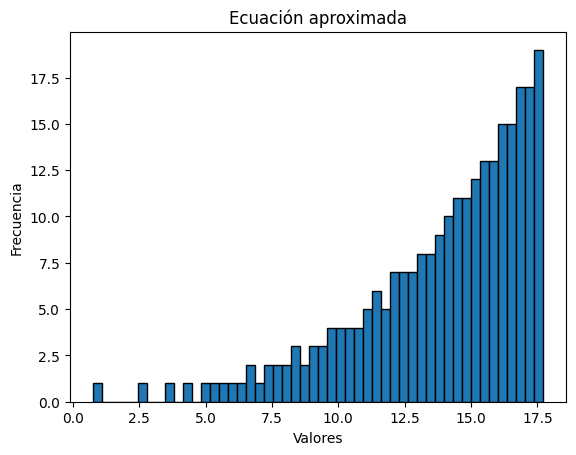

In [78]:
# Valores Ecuación precisa
plt.boxplot(yj_eq2, vert=False)
plt.title("Ecuación aproximada")
plt.xlabel("Valores")
plt.grid(True)
plt.show()
# Visualizar el histograma
plt.hist(yj_eq2, 50, edgecolor='black')
plt.title("Ecuación aproximada")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.show()

In [81]:
_yj_eq1, critical_values_eq1, significance_levels_eq1 = stats.anderson(yj_eq1, dist='norm')
_yj_eq2, critical_values_eq2, significance_levels_eq2 = stats.anderson(yj_eq2, dist='norm')
_data, critical_values_data, significance_levels_data = stats.anderson(data, dist='norm')

print(f"Resultados para Ecuación Aproximada:")
print(f"Estadístico Anderson-Darling: {_yj_eq1}")
print("Niveles críticos:", critical_values_eq1)
print("Niveles de significancia:", significance_levels_eq1)
print("-" * 30)

print(f"\nResultados para Ecuación Exacto:")
print(f"Estadístico Anderson-Darling: {_yj_eq2}")
print("Niveles críticos:", critical_values_eq2)
print("Niveles de significancia:", significance_levels_eq2)
print("-" * 30)

print(f"\nResultados para Datos originales:")
print(f"Estadístico Anderson-Darling: {_data}")
print("Niveles críticos:", critical_values_data)
print("Niveles de significancia:", significance_levels_data)
print("-" * 30)

Resultados para Ecuación Aproximada:
Estadístico Anderson-Darling: 8.767656369418944
Niveles críticos: [0.567 0.646 0.775 0.904 1.076]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
------------------------------

Resultados para Ecuación Exacto:
Estadístico Anderson-Darling: 7.324450023099871
Niveles críticos: [0.567 0.646 0.775 0.904 1.076]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
------------------------------

Resultados para Datos originales:
Estadístico Anderson-Darling: 22.737385535393685
Niveles críticos: [0.567 0.646 0.775 0.904 1.076]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
------------------------------


Vemos que la diferencia entre el valor estadístico y el valor crítico es muy importante, por lo que no se sigue una distribución normal.

Se tuvieron resultados muy parecidos al modelo de Box-cox.

## Conclusiones

El escalamiento permite un mejor ajuste en la distribución de los datos debido a que se permite la modificación de las caracterísitcas de forma de las varibales a convenencia para que  se compartan valores medios o variaciones. Forzar la normalización de los datos puede llevarnos a un cambio radical en la distribución de los mismos, obteniendo distribuciones contrarias a la vista en la distribución de los datos originales.